# Task 1

We are demonstrating the use of a **bold** and *italics* text (and the use of a title above). 

# Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
from Scripts.functions import load_and_process

NOTE: Our code for Method chaining 1 and 2 (load_and_process) is found in 'functions.py' in the 'Scripts' folder. We renamed columns, dropped columns, made some calculations, assigned causal ratios, calculated an average temperature and made the columns more descriptive.

In [3]:
df=load_and_process('../Data/Raw/hour.csv')

In [4]:
df

,Instant,Date,Season,Month,Hour,Holiday?,Day of Week,Workday?,Weather Situation,Temperature,Feeling Temperature,Casual Users,Registered User,Total Users,Casual_Ratio,Average_temperature,Wind Speed
0,1,2011-01-01,Winter,January,0,False,Saturday,False,Sunny,9.84,14.395,3,13,16,0.187500,0.26395,0.0000
1,2,2011-01-01,Winter,January,1,False,Saturday,False,Sunny,9.02,13.635,8,32,40,0.200000,0.24635,0.0000
2,3,2011-01-01,Winter,January,2,False,Saturday,False,Sunny,9.02,13.635,5,27,32,0.156250,0.24635,0.0000
3,4,2011-01-01,Winter,January,3,False,Saturday,False,Sunny,9.84,14.395,3,10,13,0.230769,0.26395,0.0000
4,5,2011-01-01,Winter,January,4,False,Saturday,False,Sunny,9.84,14.395,0,1,1,0.000000,0.26395,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,December,19,False,Monday,True,Cloudy,10.66,12.880,11,108,119,0.092437,0.25880,11.0014
17375,17376,2012-12-31,Winter,December,20,False,Monday,True,Cloudy,10.66,12.880,8,81,89,0.089888,0.25880,11.0014
17376,17377,2012-12-31,Winter,December,21,False,Monday,True,Sunny,10.66,12.880,7,83,90,0.077778,0.25880,11.0014
17377,17378,2012-12-31,Winter,December,22,False,Monday,True,Sunny,10.66,13.635,13,48,61,0.213115,0.26635,8.9981


In [5]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Date,17379,731,2011-08-05,24
Season,17379,4,Summer,4496
Month,17379,12,May,1488
Holiday?,17379,2,False,16879
Day of Week,17379,7,Saturday,2512
Workday?,17379,2,True,11865
Weather Situation,17379,4,Sunny,11413


# Task 4 - EDA (Medha)

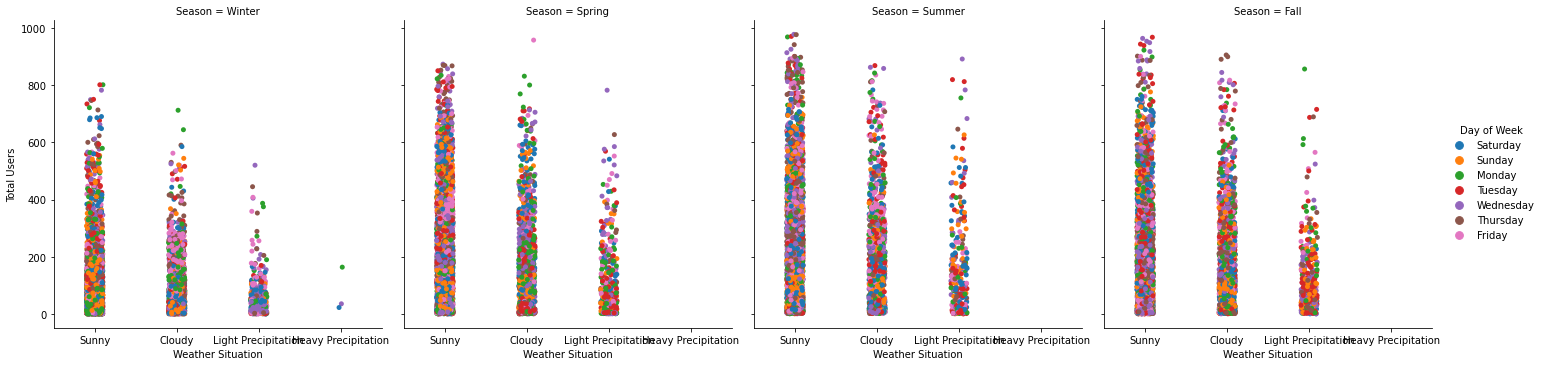

In [6]:
graph=sns.catplot(data=df, y= "Total Users",x= "Weather Situation", hue= "Day of Week",col="Season")

The four graphs show the total amount of bicycle users per season as well as an analysis of the weather situation. There seems to be a direct correlation between the weather situation and the amount of users. Unsurprisingly, there seems to be little to no bicycle riders when there is heavy precipitation. There also seems to be less bicycle riders during winter as compared to the three other seasons (even when it is sunny). 

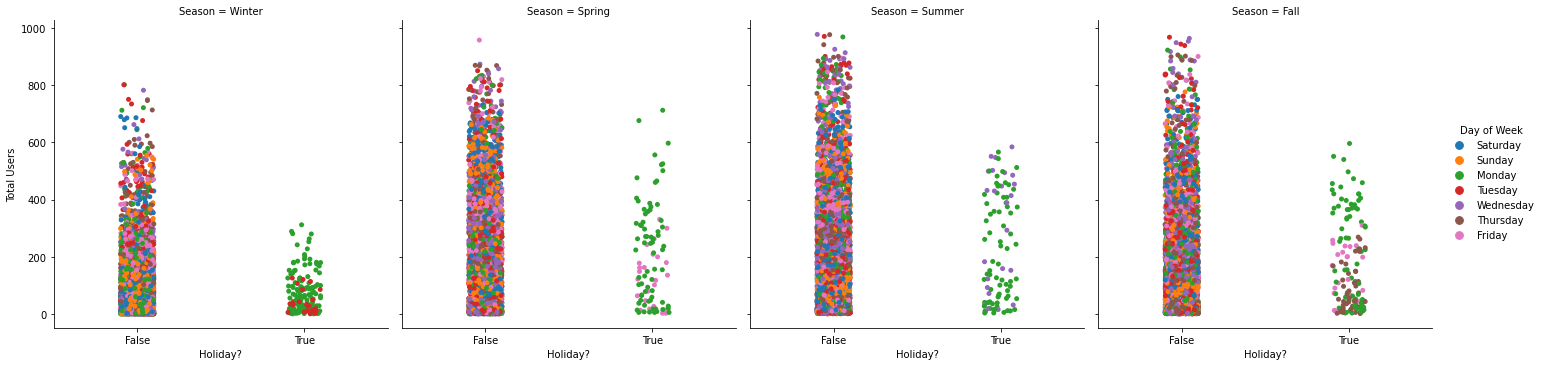

In [7]:
graph_1=sns.catplot(data=df, y= "Total Users",x= "Holiday?", hue= "Day of Week",col="Season")

There are four graphs, each representing different seasons. I am trying to investigate whether there is a correlation between total users and holidays per season. It is interesting to see that people consistently, across all seasons, use their bicycles way less during holidays.

<AxesSubplot:xlabel='Season', ylabel='Total Users'>

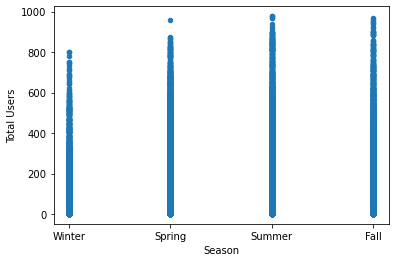

In [8]:
df.plot(kind='scatter',x='Season', y='Total Users')

When analyzing the relationship between total Users and Season directly (without any other variables), it is now clearer that while summer and fall both reach a peak(around 1000 as demonstrated by the graph), bicycles are used way less during winter (arounf 800-850, as shown by the graph). 

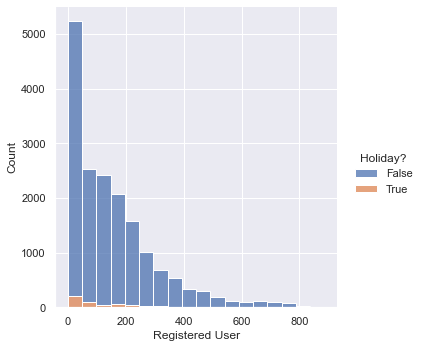

In [41]:
sns.displot(data=df, x = "Registered User", bins=18, hue = "Holiday?", multiple="stack")

plt.show()

It is now clearer that there is a direct relationship between registered users and holidays. Bicycles are more frequently used when there are no holidays. 

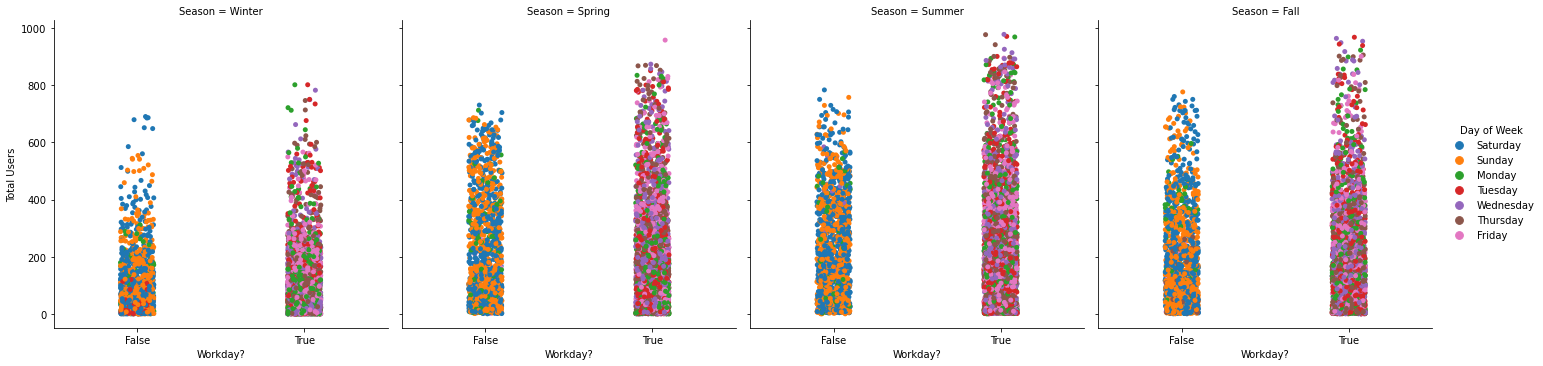

In [10]:
graph_1=sns.catplot(data=df, y= "Total Users",x= "Workday?", hue= "Day of Week",col="Season")

Now this is interesting because while we see the same tendency as above, that there are less users during winter, we can also see that the differences between workday and not workday is smaller than holiday and not holiday, for the same period. I thought that there still would have been a big difference since there was a big difference between holiday and not a holiday.

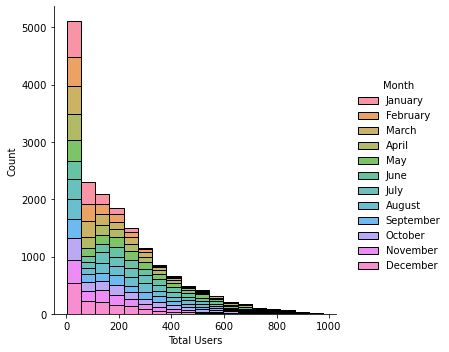

In [11]:
sns.displot(data=df, x = "Total Users", bins=18, hue = "Month",multiple="stack")

The histogram below shows that there are way less bicycle users during November and December.

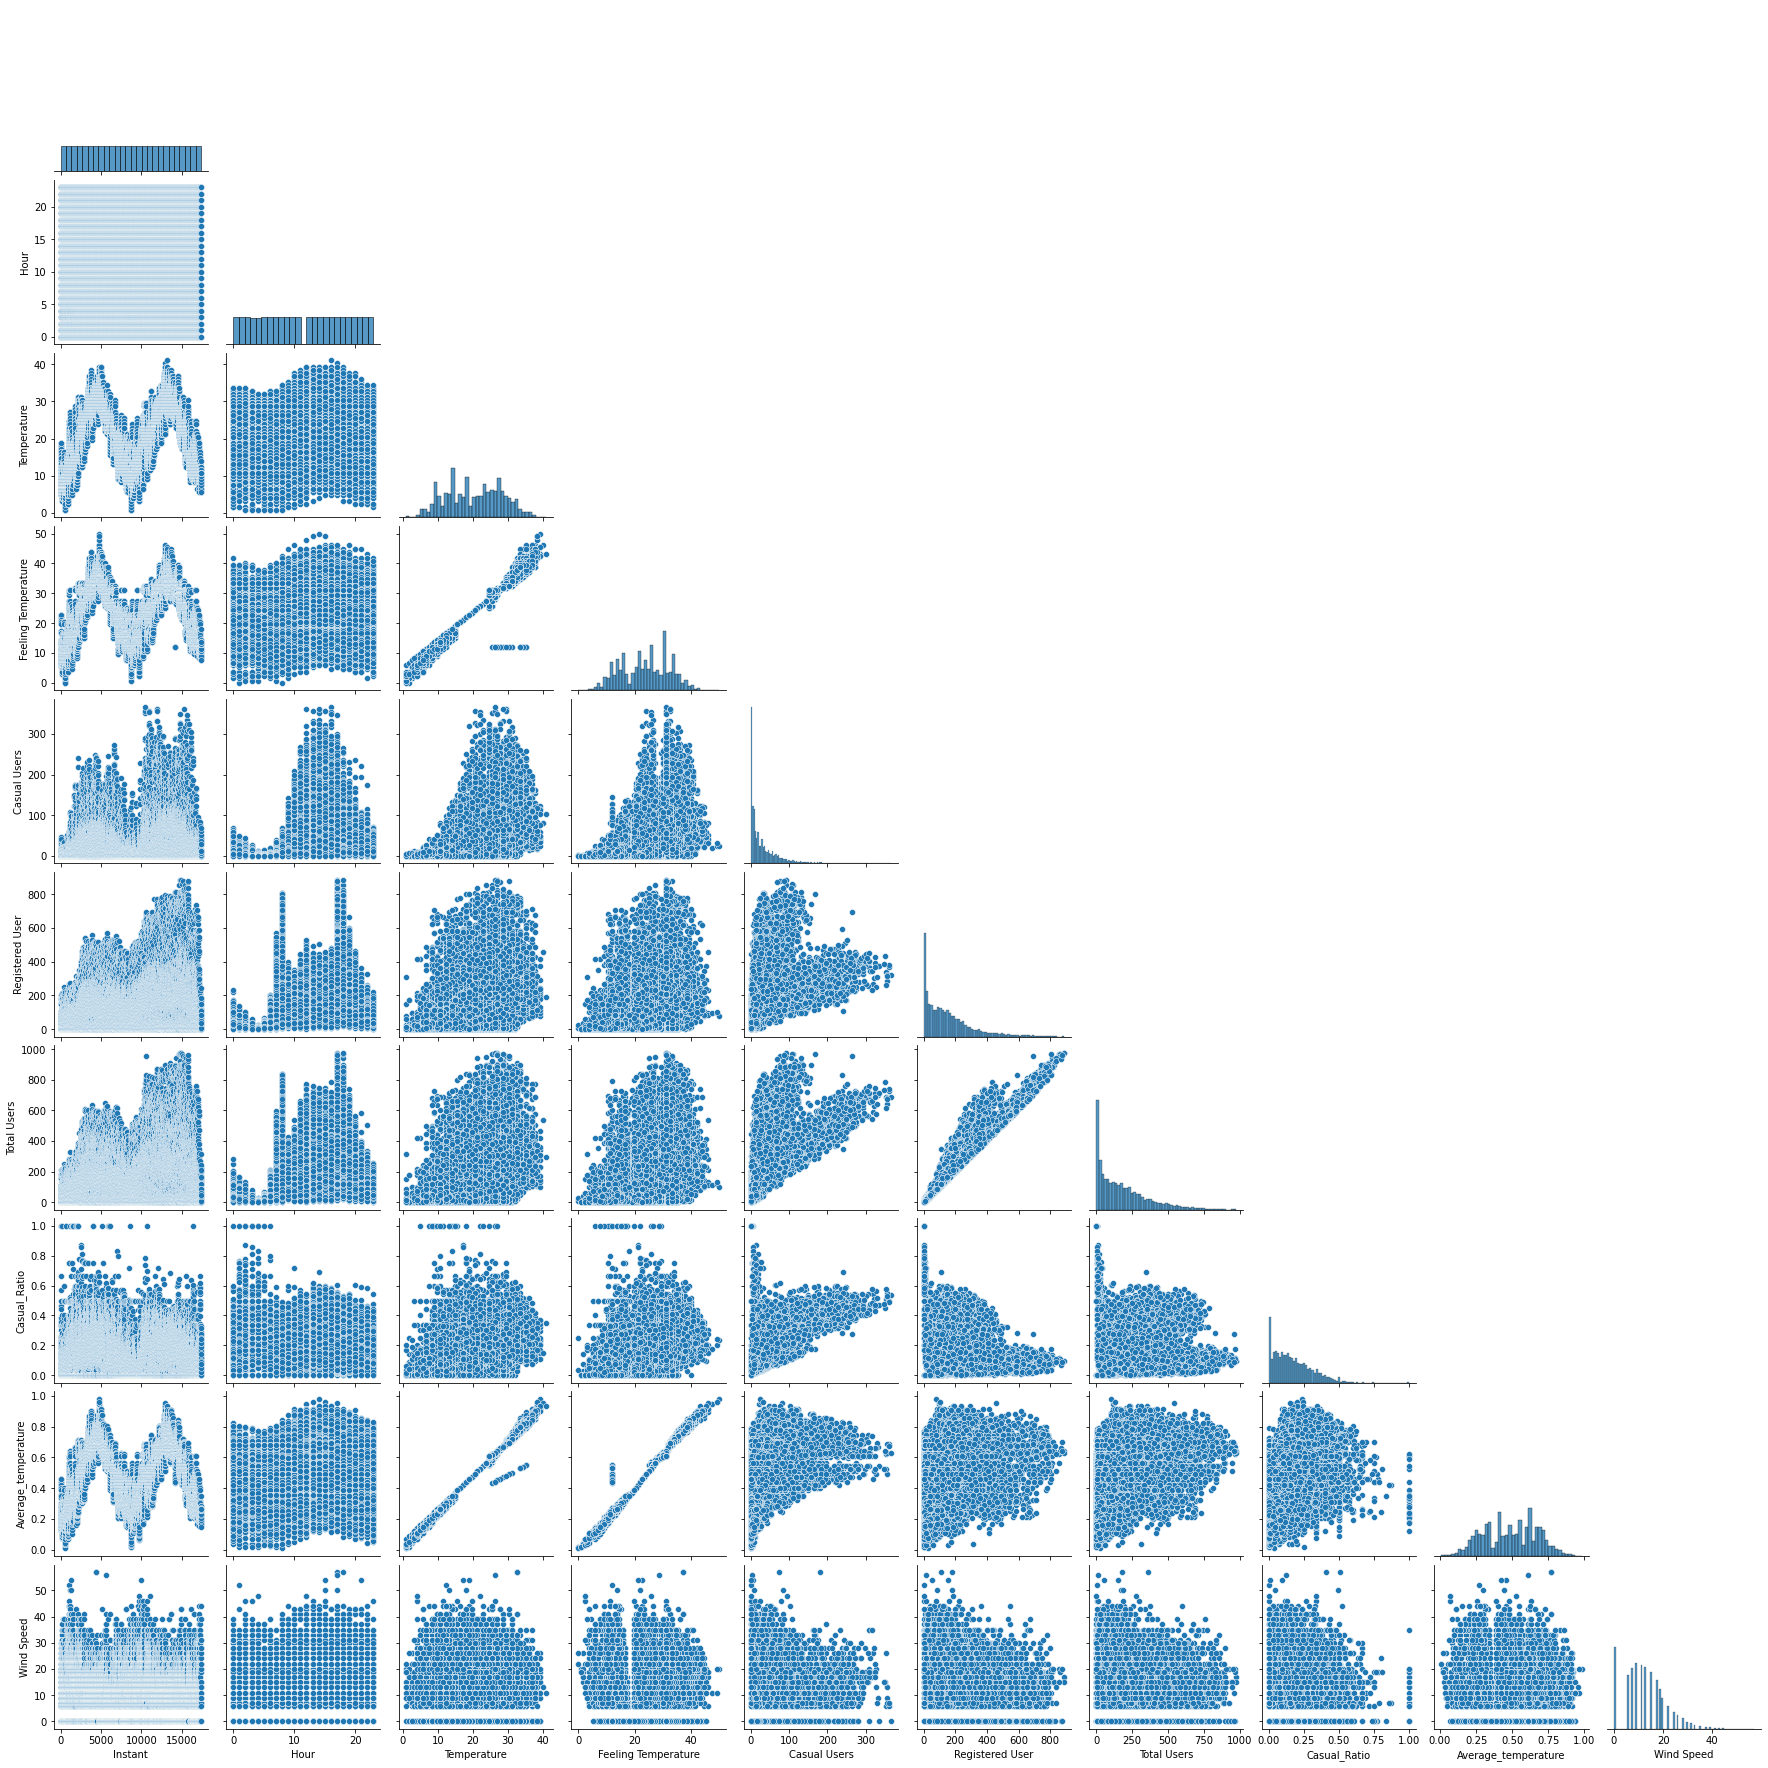

In [12]:
sns.pairplot(data=df.select_dtypes(include='number'), 
             corner=True)

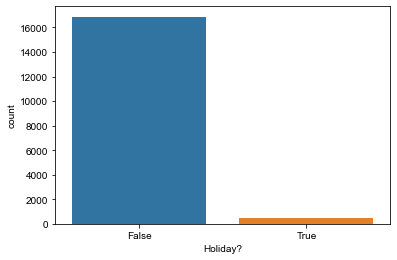

In [13]:
sns.countplot(x='Holiday?', data=df)
sns.set(rc={'figure.figsize':(11.7,6.27)})

This shows the number of occurences holidays. The graph demonstrates that there are way less holidays than working weekdays. This is important since we found that people tend to not use their bicycles a lot during holidays. 

Exploring different dataset possibilities

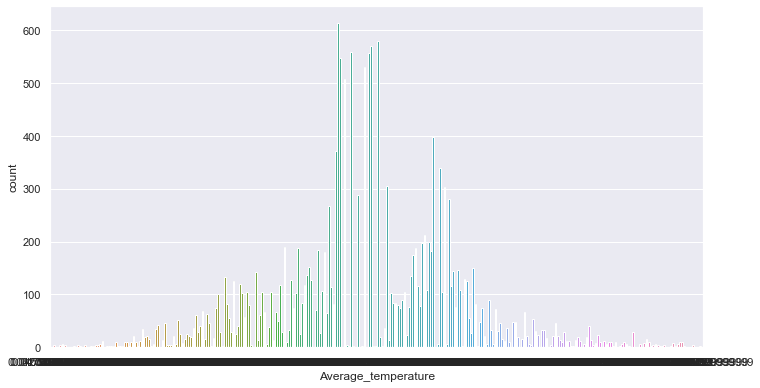

In [14]:
sns.countplot(x='Average_temperature', data=df)
sns.set(rc={'figure.figsize':(11.7,6.27)})

Show counts of Average_temperature which is the average between Feeling temperature and Temperature

# Task 4 - Olivia

<AxesSubplot:xlabel='count', ylabel='Season'>

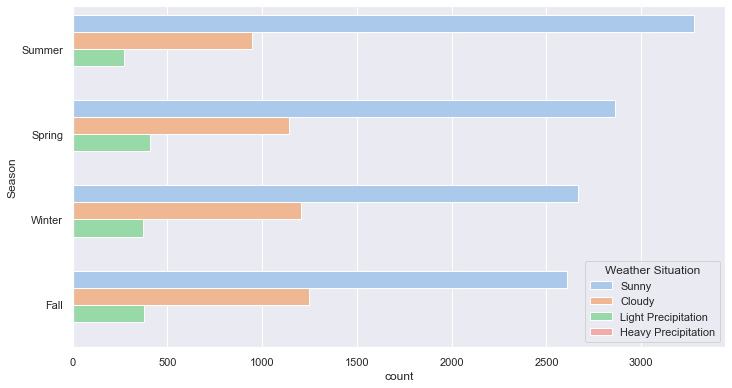

In [15]:
sns.countplot(data=df, y= "Season", palette= 'pastel', order= df['Season'].value_counts().index[:], hue= 'Weather Situation')


Interestingly, the general ratio of the different weather situations did not change drastically beetween the seasons, and there were many sunny days - it must be beautiful in DC all year round!

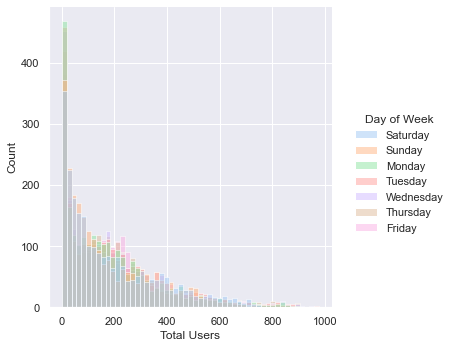

In [16]:
sns.displot(data=df, x= ("Total Users"), palette= 'pastel', hue= 'Day of Week')

plt.show()

From this plot, it is evident that the count of total users is very high on Tuesdays, and Mondays. There are also a fair amount of users on the weekends (Saturday and Sunday).

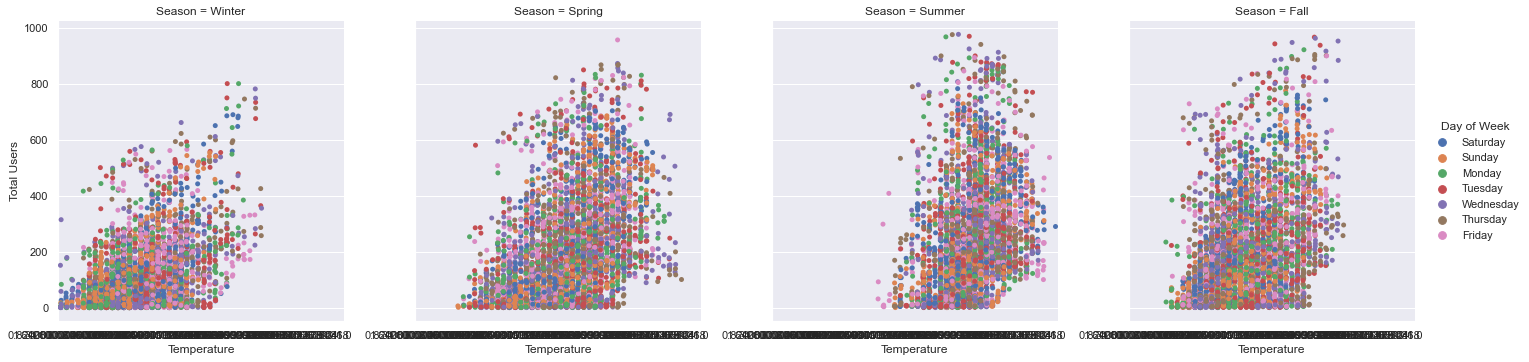

In [17]:
graph=sns.catplot(data=df, y= "Total Users",x= "Temperature", hue= "Day of Week",col="Season")


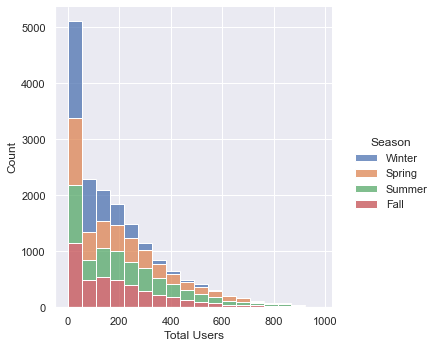

In [18]:
sns.displot(data=df, x = "Total Users", bins=18, hue = "Season", multiple="stack")

plt.show()

The histogram shows that it is more probable that there will be around 0-200 users per hour, while it is more rare for there to be greater amounts of users in an hour. This trend occurs for all seasons, however it looks as though it is much less probable for there to be a high amount of users in the winter. 

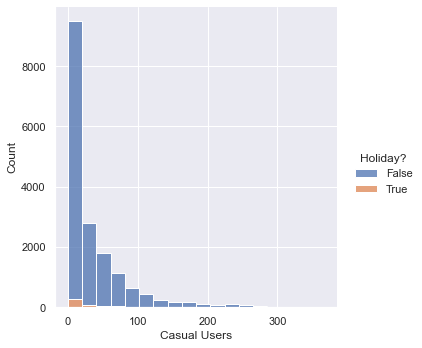

In [19]:
sns.displot(data=df, x = "Casual Users", bins=18, hue = "Holiday?", multiple="stack")

plt.show()

This plot is not very informative about the relationship between total users and whether it is a holiday or not. 

In [20]:
df.describe(exclude=np.object).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
Hour,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
Holiday?,17379,2,False,16879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workday?,17379,2,True,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,17379.0,NaN,NaN,NaN,20.376474,7.894801,0.82,13.94,20.5,27.06,41.0
Feeling Temperature,17379.0,NaN,NaN,NaN,23.788755,8.592511,0.0,16.665,24.24,31.06,50.0
Casual Users,17379.0,NaN,NaN,NaN,35.676218,49.30503,0.0,4.0,17.0,48.0,367.0
Registered User,17379.0,NaN,NaN,NaN,153.786869,151.357286,0.0,34.0,115.0,220.0,886.0
Total Users,17379.0,NaN,NaN,NaN,189.463088,181.387599,1.0,40.0,142.0,281.0,977.0
Casual_Ratio,17379.0,NaN,NaN,NaN,0.172143,0.136557,0.0,0.063492,0.146893,0.253731,1.0


Evidently, the average number of registered users is much greater than the average number of casual users over the entire dataset. The minimum temperature in the dataset is 0.82, which the average temperature os 20.38.

# Task 5 - Analysis

**Research Questions:**
    
1. What is the relationship between day of the week, and number of casual vs. registered users? Are there more registered users on weekdays, and casual users on weekends?
   
2. Does weather affect the total number of users?
    
3. Is there a spike in number of users on holidays?

1. What is the relationship between day of the week, and number of casual vs. registered users? Are there more registered users on weekdays, and casual users on weekends?

<AxesSubplot:xlabel='Day of Week', ylabel='Casual Users'>

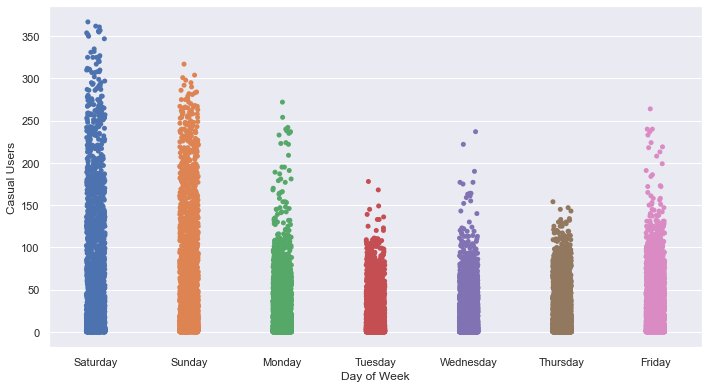

In [21]:
sns.stripplot(data=df, x='Day of Week', y='Casual Users')

As we can see in the above plot, there is a very high amount of casual users on Saturday and Sunday, followed by Monday, and Friday. There is the least amount of users on Tuesday, Wednesday, and Thursday. 

<AxesSubplot:xlabel='Workday?', ylabel='Casual Users'>

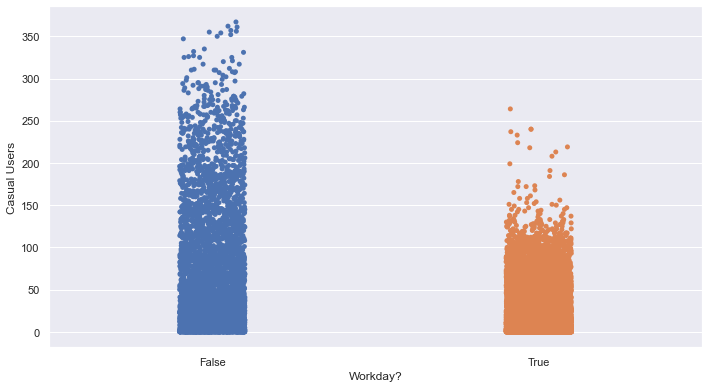

In [22]:
sns.stripplot(data=df,x='Workday?', y='Casual Users')

There are many more casual users on non-workdays than there are on workays. 

<AxesSubplot:xlabel='Workday?', ylabel='Registered User'>

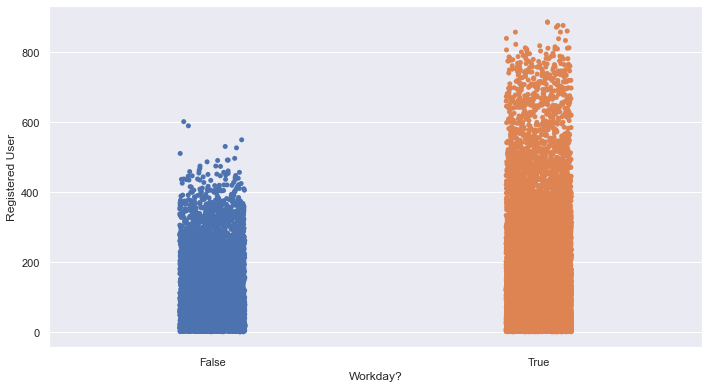

In [23]:
sns.stripplot(data=df,x='Workday?', y='Registered User')

There are many more registered users on workdays than on weekends. In conjunction with the previous plot, we can deduce that the individuals who wish to ride their bike to work will register, while the casual users are more likely to ride a bike on the weekends.

<AxesSubplot:xlabel='Day of Week', ylabel='Registered User'>

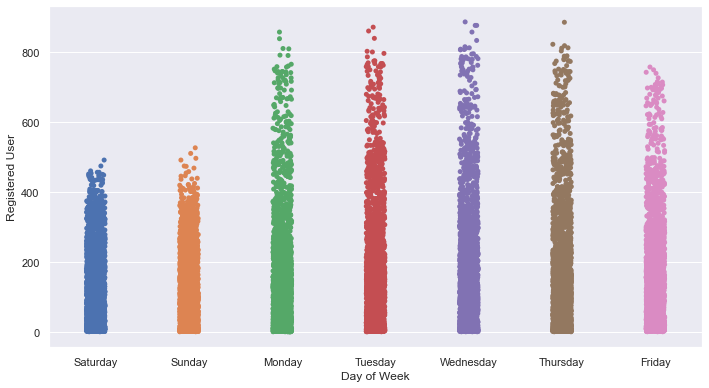

In [24]:
sns.stripplot(data=df,x='Day of Week', y='Registered User')

As shown above, the number of registered users is much higher on weekdays than on weekends. This further supports the conclusion that was made above. 

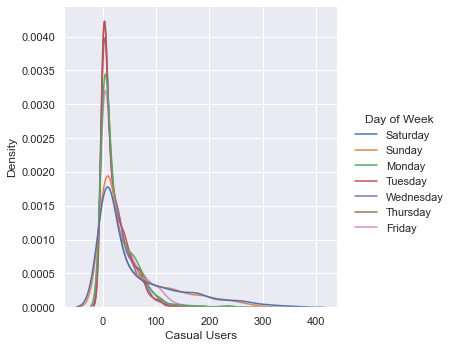

In [25]:
sns.displot(df, x="Casual Users", hue="Day of Week", kind="kde")

Because the density plot is so narrow on tuesdays, it means that there it is less likely for there to be a large amount of users per hour on these days, which supports out findings above. Becuase the density plots are more evenly distributed on the weekends, it means that there is more likely to be a greater amount of users per hour on the weekends. 

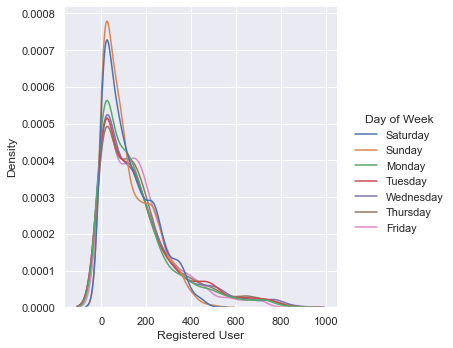

In [26]:
sns.displot(df, x="Registered User", hue="Day of Week", kind="kde")

In contrast to the plot above that shows the density plot for casual users per hour, this plot shows the density of registered users per hour. The density plot is much narrower and less spread on the weekends because there is more likely to be a smaller number of registered users per hour on Saturday and Sunday. 

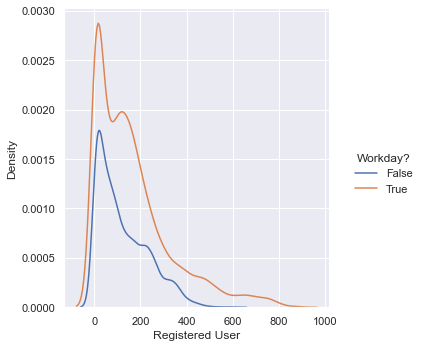

In [27]:
sns.displot(df, x="Registered User", hue="Workday?", kind="kde")

There seems to be more registered users on workdays - this is likely becuase there is many more workdays than non-workdays.

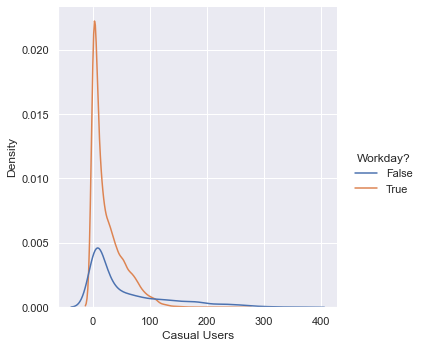

In [28]:
sns.displot(df, x="Casual Users", hue="Workday?", kind="kde")

The density plot shows a large spike that is centred around a smaller count of casual users for workdays. On the other hand, the density plot for non-workdays is much more spread, meaning there there is a higher likelihood that there will be more casual users per hour on a weekend.

In [29]:
df4 = df[df['Workday?']==True]
df5 = df[df['Workday?']==False]

In [30]:
df4['Total Users'].mean()
# The average number of total users per hour on workdays.

193.20775389801938

In [31]:
df5['Total Users'].mean()
# The average number of total users per hour on non-workdays.

181.40533188248097

**Conclusion for question 1:** There is an overwhelming amount of evidence that there are more registered users per hour on weekdays, while there are more casual users per hour on weekdays. In other words, registered users are more likely to use bikes on weekdays, while casual users are more likely to use bikes on weekends. This is perhaps because users who ride their bikes to work on weekdays are more likely to register. On the other hand, those who are going for a leisurely bike ride on weekends are less likely to register. 

Interestingly, the average number of total users per hour is slightly higher on workdays than on non-workdays.

2. Does weather affect the total number of users?

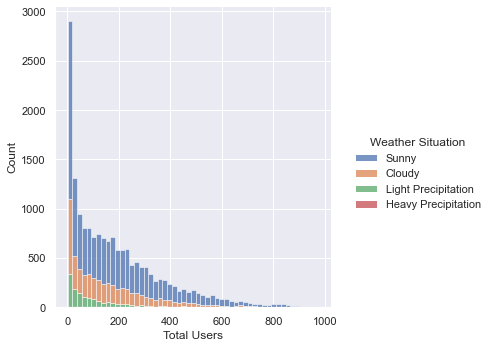

In [32]:
sns.displot(data=df, x= ("Total Users"), hue= 'Weather Situation',multiple='stack')

plt.show()

It is difficult to conclude the relationship between total user and weather situation from this plot. 

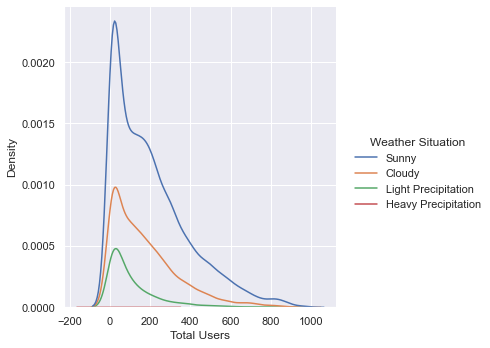

In [33]:
sns.displot(df, x="Total Users", hue="Weather Situation", kind="kde")

The distribution of total weather for Sunny, Cloudy, and Light precipitation days follow the same trend - there is a higher density for smaller counts of total user per hour. However, the total density of users is much higher for sunny days, followed by cloudy days, and the smallest density for light precipitation. The density for heavy precipitation is so small that no meaningful conclusions can be made. 

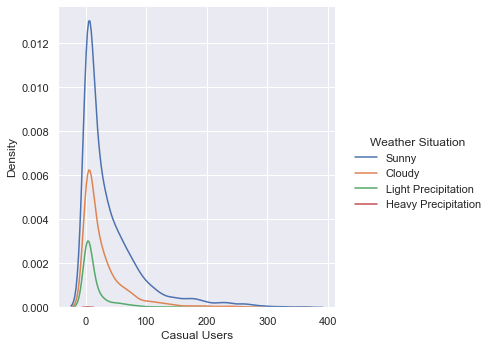

In [34]:
sns.displot(df, x="Casual Users", hue="Weather Situation", kind="kde")

This plot shows the same trend as for total users (plot above).

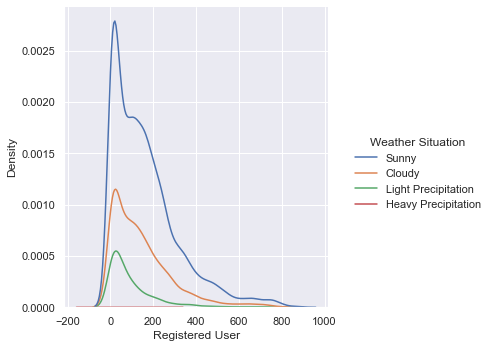

In [35]:
sns.displot(df, x="Registered User", hue="Weather Situation", kind="kde")

This plot shows the same general trend as for total users and casual users (see plots above). 

<AxesSubplot:xlabel='Weather Situation', ylabel='Total Users'>

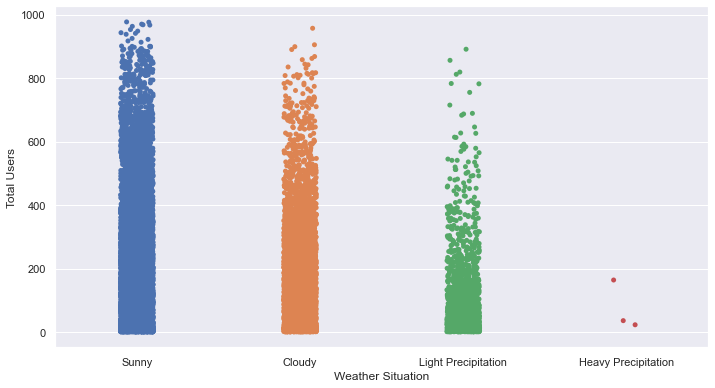

In [36]:
sns.stripplot(data=df,x='Weather Situation', y='Total Users')

This plot confirms that there is a higher number of total users on sunny days, with slightly less on cloudy days and light precipitation days. There are very few users on heavy precipitation days.

**Conclusion for question 2:** The data shows that there are the highest number of total users on sunny days. There are less on cloudy days, followed by even less on light precipitation days, with very few on heavy precipitation days. This trend is consistent when looking individually at casual users or registered users. 

3. Is there a spike in number of users on holidays?

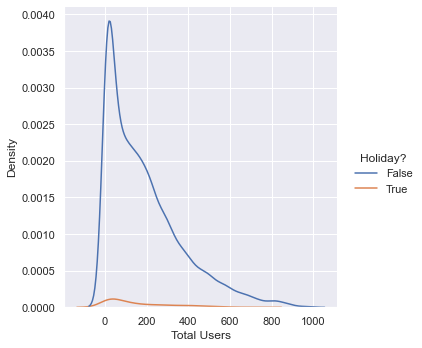

In [37]:
sns.displot(df, x="Total Users", hue="Holiday?", kind="kde")

This plot shows that there are many more users on non-holidays, but does does not provide any insight into relative amounts, so it is not useful - another method must be used (see below).

In [38]:
df2 = df[df['Holiday?']==True]
df3 = df[df['Holiday?']==False]

In [39]:
df2['Total Users'].mean()

#The average number of total users per hour on holidays. 

156.87

In [40]:
df3['Total Users'].mean()

#The average number of total users per hour on non-holidays.

190.4285798921737

**Conclusion for question 3:** As shown by the averages above, the average value of users in an hour is slightly lower on holidays (156.87) than on non-holidays (190.43), however the difference is very minor. When looking at the total number of users on holidays vs. non-holidays, there is a substantially larger total count on non-holidays - this is because there are so many more non-holidays than there are holidays. 